<a href="https://colab.research.google.com/github/JavaOliverLu/python/blob/master/AP4062_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
#!pip install -q keras


In [122]:
import keras
from keras.datasets import cifar10
from keras import models
from keras import layers
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()


In [113]:
from keras import regularizers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu',
input_shape=(32 * 32 * 3,)))
network.add(layers.Dense(40, kernel_regularizer=regularizers.l2(0.001),
activation='sigmoid'))
network.add(layers.Dense(20, kernel_regularizer=regularizers.l2(0.001),
activation='relu'))
network.add(layers.Dense(10, activation='softmax'))


In [114]:
network.compile(optimizer='sgd',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [115]:
train_images = train_images.reshape((50000, 32 * 32 * 3))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 32 * 32 * 3))
test_images = test_images.astype('float32') / 255

In [116]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [117]:
history =network.fit(train_images, train_labels, epochs=20, batch_size=256)

Epoch 1/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.1262 - loss: 2.3919
Epoch 2/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - accuracy: 0.2072 - loss: 2.3101
Epoch 3/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.2422 - loss: 2.2488
Epoch 4/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - accuracy: 0.2654 - loss: 2.1905
Epoch 5/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.2812 - loss: 2.1416
Epoch 6/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - accuracy: 0.2890 - loss: 2.1063
Epoch 7/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.2991 - loss: 2.0765
Epoch 8/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.3080 - loss: 2.0461
Epoch 9/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.3115 - loss: 2.0351
Epoch 10/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.3169 - loss: 2.0147
Epoch 11/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.3266 - loss: 1.9966
Epoch 12/20
196/196 ━━━━━━━━━━━━━━━━━

In [118]:
test_loss, test_acc = network.evaluate(test_images, test_labels)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3754 - loss: 1.8711


ADDITIONAL AREA

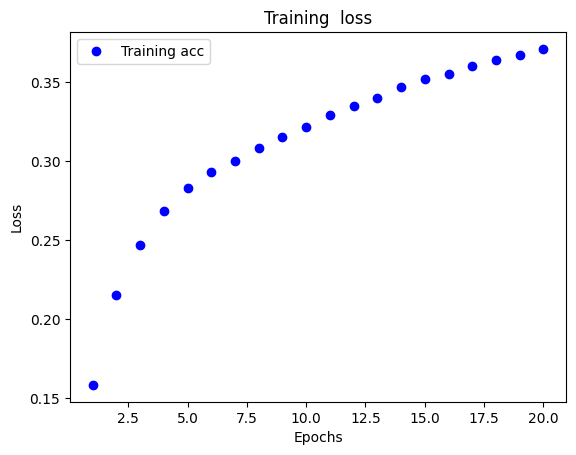

In [119]:
import matplotlib.pyplot as plt
history_dict = history.history
accuracy = history_dict['accuracy']

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'bo', label='Training acc')
plt.title('Training  loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
#show accuracy

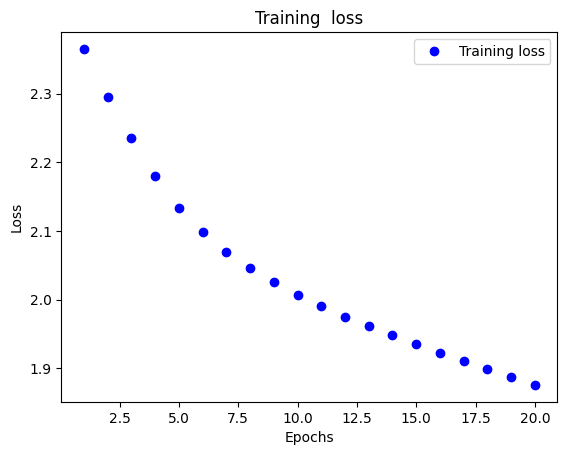

In [120]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.title('Training  loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
#show loss

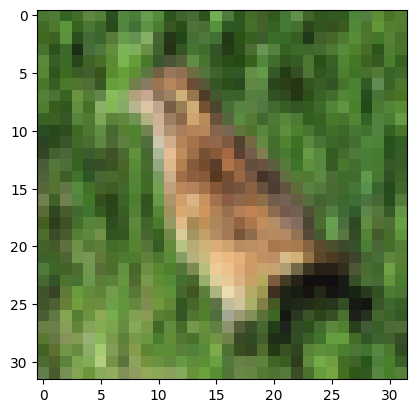

In [124]:
digit = train_images[2340]
import matplotlib.pyplot as plt
plt.imshow(digit)
#plt.show(digit)